![](img/banner.png)
%%HTML
<script src="require.js"></script>

# Template Matching

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

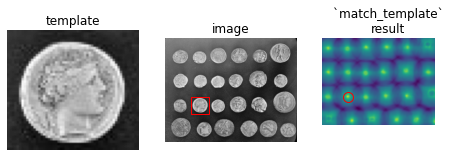

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template

from skimage import color, img_as_ubyte
from skimage.draw import rectangle

image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

https://github.com/Sri-Sai-Charan/Template-Matching

In [22]:
def sum_of_squared_differences(image, template):
    I, T = image.astype('float'),template.astype('float')
    H, W = I.shape[0], I.shape[1]
    h, w = T.shape[0], T.shape[1]
    R = np.ones_like(image)*np.inf
    
    for i in range(W-w):
        for j in range(H-h):
            t = (I[j: j+h, i: i+w] - T).ravel()
            R[j, i] = t.dot(t)

    return R

def template_matching(image, template):
    # Compute normalized cross-correlation
    # result = match_template(image, template)
    R = sum_of_squared_differences(image, template)
    # Find the location of the maximum correlation
    max_loc = np.unravel_index(np.argmax(R), R.shape)
    top_left = max_loc
    h, w = template.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)

    return R, top_left, bottom_right
    
# def template_matching(image, template):
#     R = sum_of_squared_differences(image, template)
#     _, _, min_loc, max_loc = cv2.minMaxLoc(-R)
#     top_left = max_loc
#     h,w = template.shape
#     bottom_right = (top_left[0] + w, top_left[1] + h)
#     return R, top_left,bottom_right

# def plot_image(map_puzzle,top_left,bottom_right):
#   region_of_interest = map_puzzle[top_left[1] : bottom_right[1], top_left[0] : bottom_right[0]]
#   mask = np.zeros(map_puzzle.shape, dtype = "uint8")
#   image_map = cv2.addWeighted(map_puzzle, 0.3, mask, 0.7, 0)
#   image_map[top_left[1] : bottom_right[1], top_left[0] : bottom_right[0]] = region_of_interest
#   final_result = cv2.cvtColor(image_map, cv2.COLOR_RGB2BGR)
#   cv2.rectangle(final_result, top_left, bottom_right, (0,255,0),4)
#   return final_result

def plot_image(map_puzzle, top_left, bottom_right):
    # Extract the region of interest
    region_of_interest = map_puzzle[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

    # Create an empty mask
    mask = np.zeros_like(map_puzzle, dtype=np.uint8)

    # Blend the map_puzzle with the mask
    alpha = 0.3
    blended_image = (1 - alpha) * map_puzzle + alpha * mask

    # Place the region of interest back into the blended image
    blended_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = region_of_interest

    # Convert the blended image to BGR format
    final_result = color.gray2rgb(blended_image)

    # Draw a green rectangle
    rr, cc = rectangle(top_left, end=bottom_right)
    final_result[rr, cc] = [0, 255, 0]

    return final_result
# map_puzzle2 = cv2.imread('/content/Part4_data/puzzle2/map.jpg')
# gray_map2 = cv2.cvtColor(map_puzzle2.copy(), cv2.COLOR_BGR2GRAY)
# waldo_temp_2 = cv2.imread('/content/Part4_data/puzzle2/waldo.png')
# gray_waldo_p2 = cv2.cvtColor(waldo_temp_2.copy(), cv2.COLOR_BGR2GRAY)
# R,  top_left,bottom_right = template_matching(gray_map2,gray_waldo_p2)

R,  top_left,bottom_right = template_matching(image,coin)

result_2 = plot_image(image,top_left,bottom_right)
# plt.figure(figsize = (15, 15))
# plt.axis('off')
# plt.imshow(result_2)

In [27]:
def sum_of_squared_differences(image, template):
    I, T = image.astype('float'),template.astype('float')
    H, W = I.shape[0], I.shape[1]
    h, w = T.shape[0], T.shape[1]
    R = np.ones((H-h+1,W-w+1))*np.inf
    print(W,w)
    for i in range(W-w+1):
        for j in range(H-h+1):
            t = (I[j: j+h, i: i+w] - T).ravel()
            R[j, i] = t.dot(t)

    return R

def template_matching(image, template):
    R = sum_of_squared_differences(image, template)
    # Find the location of the maximum correlation
    max_loc = np.unravel_index(np.argmax(R), R.shape)
    top_left = max_loc
    h, w = template.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)

    return R, top_left, bottom_right

img = np.array([
    [[0], [1], [2], [10]],
    [[3], [4], [5], [11]],
    [[6], [7], [8], [12]],
    ])


t = np.array([ 
    [[4], [5]],
    [[7], [12]],
    ])

print(img.shape, t.shape)

# img_squeezed = img.squeeze()

img = img.reshape(3, 4)
t = t.reshape(2,2)
print(img.shape, t.shape)
R = sum_of_squared_differences(img,t)
R
# R,  top_left,bottom_right = template_matching(img,t)        

(3, 4, 1) (2, 2, 1)
(3, 4) (2, 2)
4 2


array([[112.,  76.,  34.],
       [ 28.,  16.,  38.]])

In [29]:
img = np.array([
    [0, 1, 2, 10],
    [3, 4, 5, 11],
    [6, 7, 8, 12]])

t = np.array([ 
    [4, 5],
    [7, 12]])

print(img.shape, t.shape)

(3, 4) (2, 2)
